In [1]:
# Gettingn started with visualization 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2, engine='openpyxl')

In [4]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# printing the dimensions of the dataframe
print(df.shape)

(195, 43)


In [6]:
# Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [7]:
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# Renaming some of the column name 
df.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName' : 'Region'}, inplace=True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
# For consistency, ensure that all column labels of type string.

# now checking if all the column type is string or not 
all(isinstance(column, str) for column in df.columns)

False

In [10]:
# Notice how the above line of code returned False when we tested if all the column labels are of type string. 
# So let's change them all to string type.
df.columns = list(map(str, df.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)


True

In [11]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
# Set the country name as index - useful for quickly looking up countries using .loc method.
df.set_index('Country', inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [13]:
# adding a new column named total 
df['Total'] = df.sum(axis=1)
df.head()


# df['Total'] is the syntax to access or create a new column in the DataFrame df. 
# Here, it specifies that we want to create a column called 'Total'.

# df.sum(axis=1) calculates the sum of values along each row (horizontally) in the DataFrame df. 
# The axis=1 parameter specifies that the sum should be computed horizontally.

# The calculated sum values are assigned to the 'Total' column, effectively adding a new column to the 
# DataFrame df with the name 'Total' and the computed sum values for each row.



C:\Users\PC\AppData\Local\Temp\ipykernel_19680\3164854347.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [15]:
df.shape

(195, 38)

In [17]:
# creating a list of years from 1980 to 2013 
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [18]:
# Visualizing Data using Matplotlib





# Area Plot 



df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()


# df.sort_values(['Total'], ascending=False, axis=0, inplace=True):

# df.sort_values() is a Pandas DataFrame method that sorts the DataFrame based on the specified 
# column(s) or label(s).
# ['Total'] specifies that we want to sort the DataFrame based on the values in the 'Total' column.
# ascending=False indicates that the sorting should be done in descending order, from highest to lowest.
# axis=0 specifies that the sorting should be performed along the rows (vertically).
# inplace=True means that the sorting operation should be applied directly to the df_can DataFrame itself,
#  modifying it in place rather than creating a new DataFrame.
# df_top5 = df_can.head():

# df_can.head() retrieves the first 5 rows (by default) of the DataFrame df_can.
# The resulting DataFrame is assigned to the variable df_top5.
# df_top5 = df_top5[years].transpose():

# df_top5[years] selects only the columns specified in the years variable from the DataFrame df_top5. 
# It assumes that years is a list or array containing the desired column names.
# .transpose() is a Pandas method that transposes the DataFrame, flipping the rows and columns.
# The transposed DataFrame is assigned back to the variable df_top5.
# df_top5.head():

# Finally, df_top5.head() is called to display the first few rows of the transposed DataFrame df_top5.


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


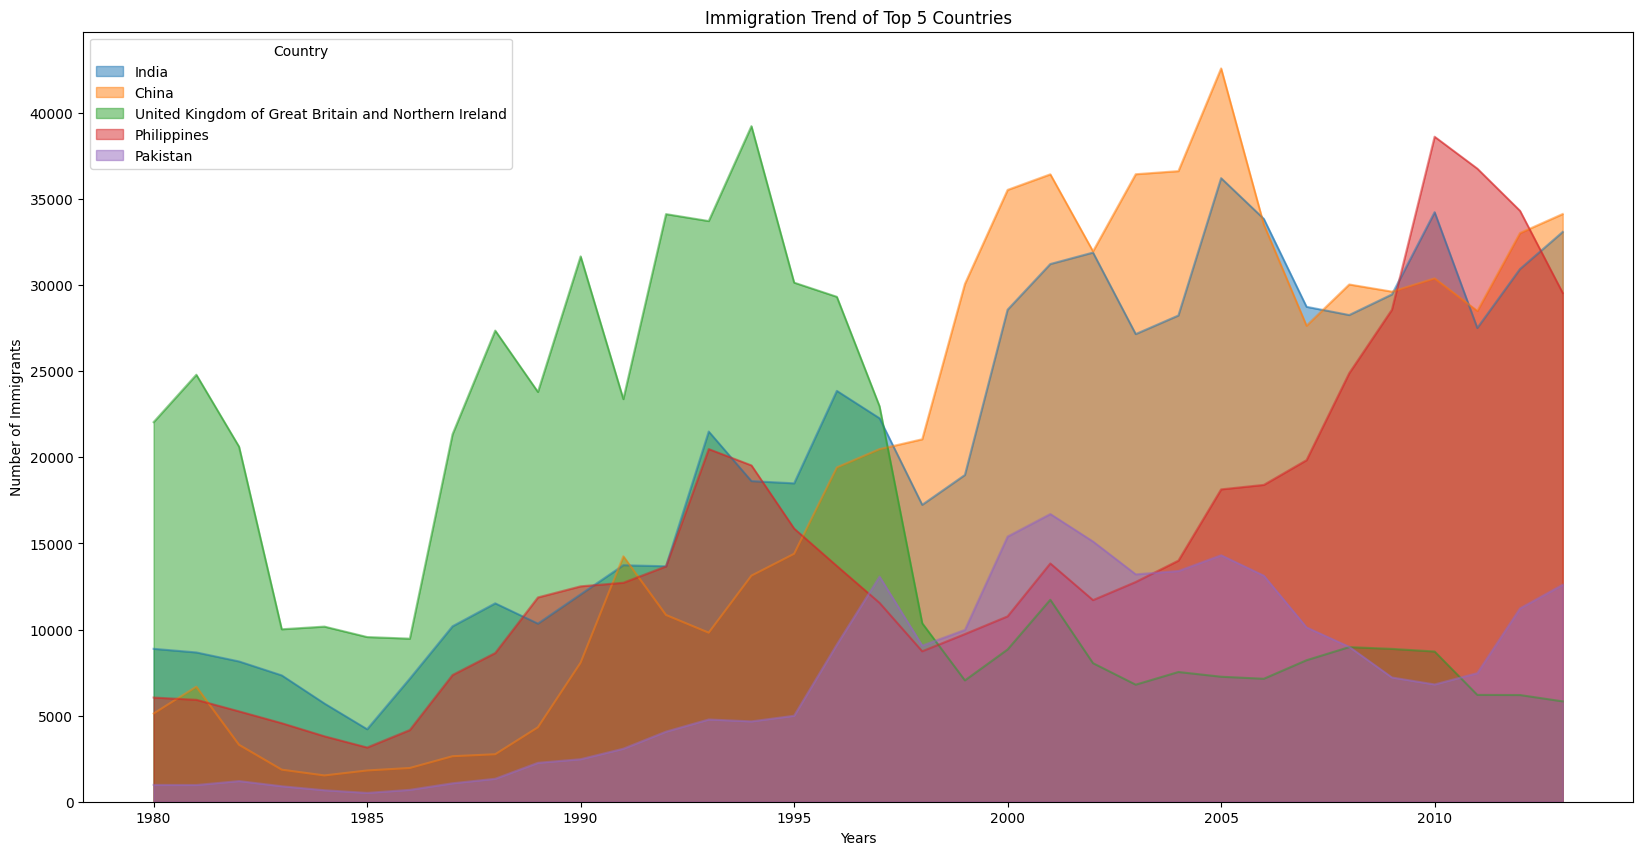

In [19]:
# showing the area plot of top 5 immigrant countries 

# Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative 
# values (any NaN, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter stacked to value False.


# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

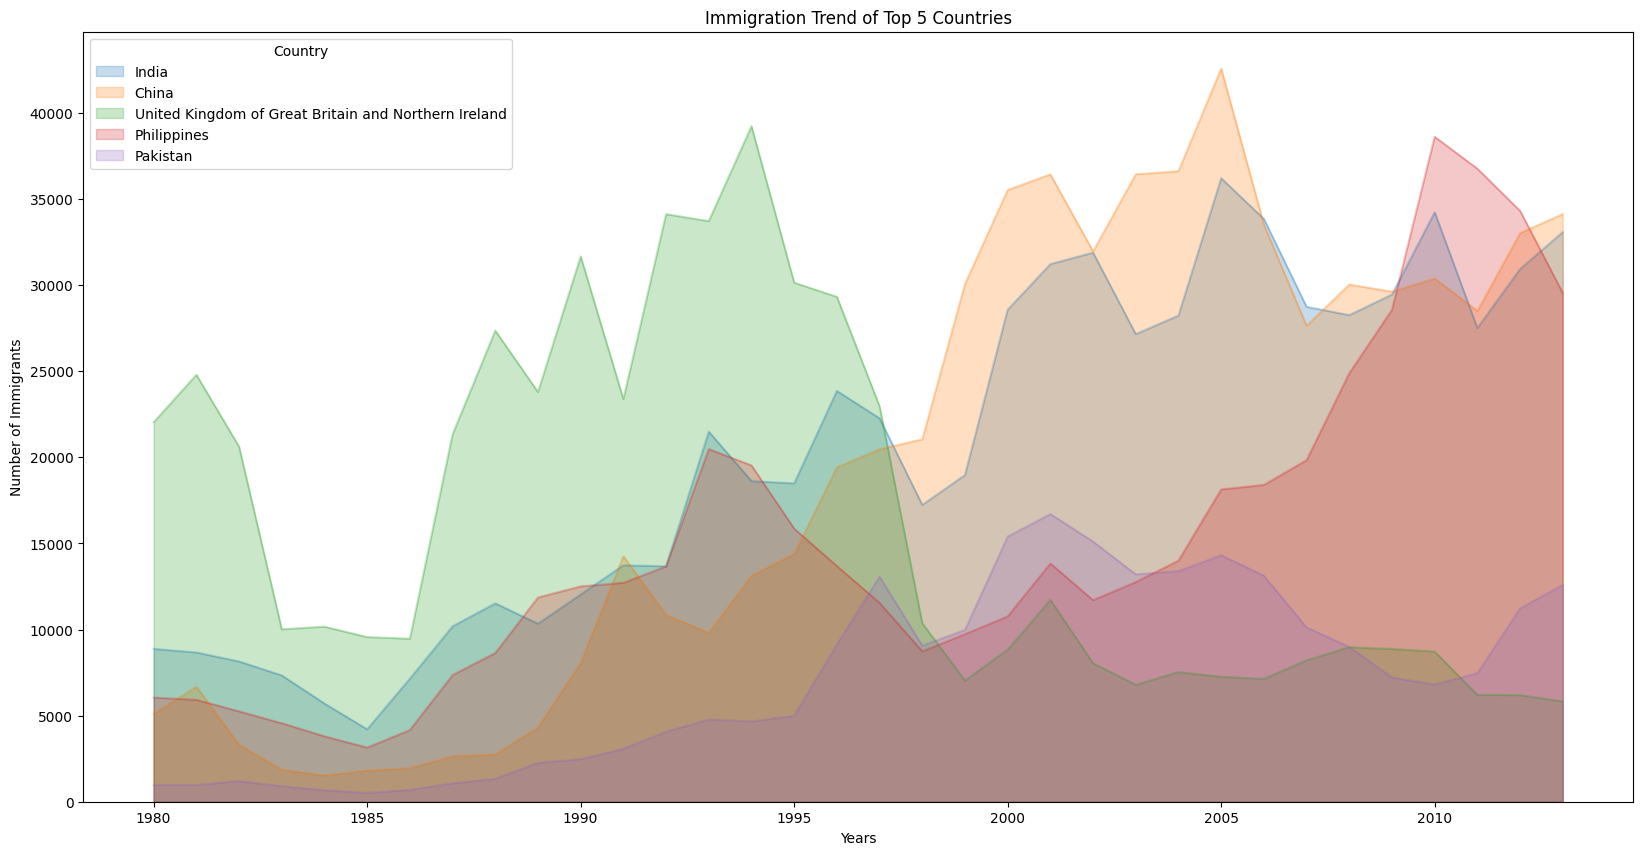

In [20]:
# The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by 
# passing in the alpha parameter.
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

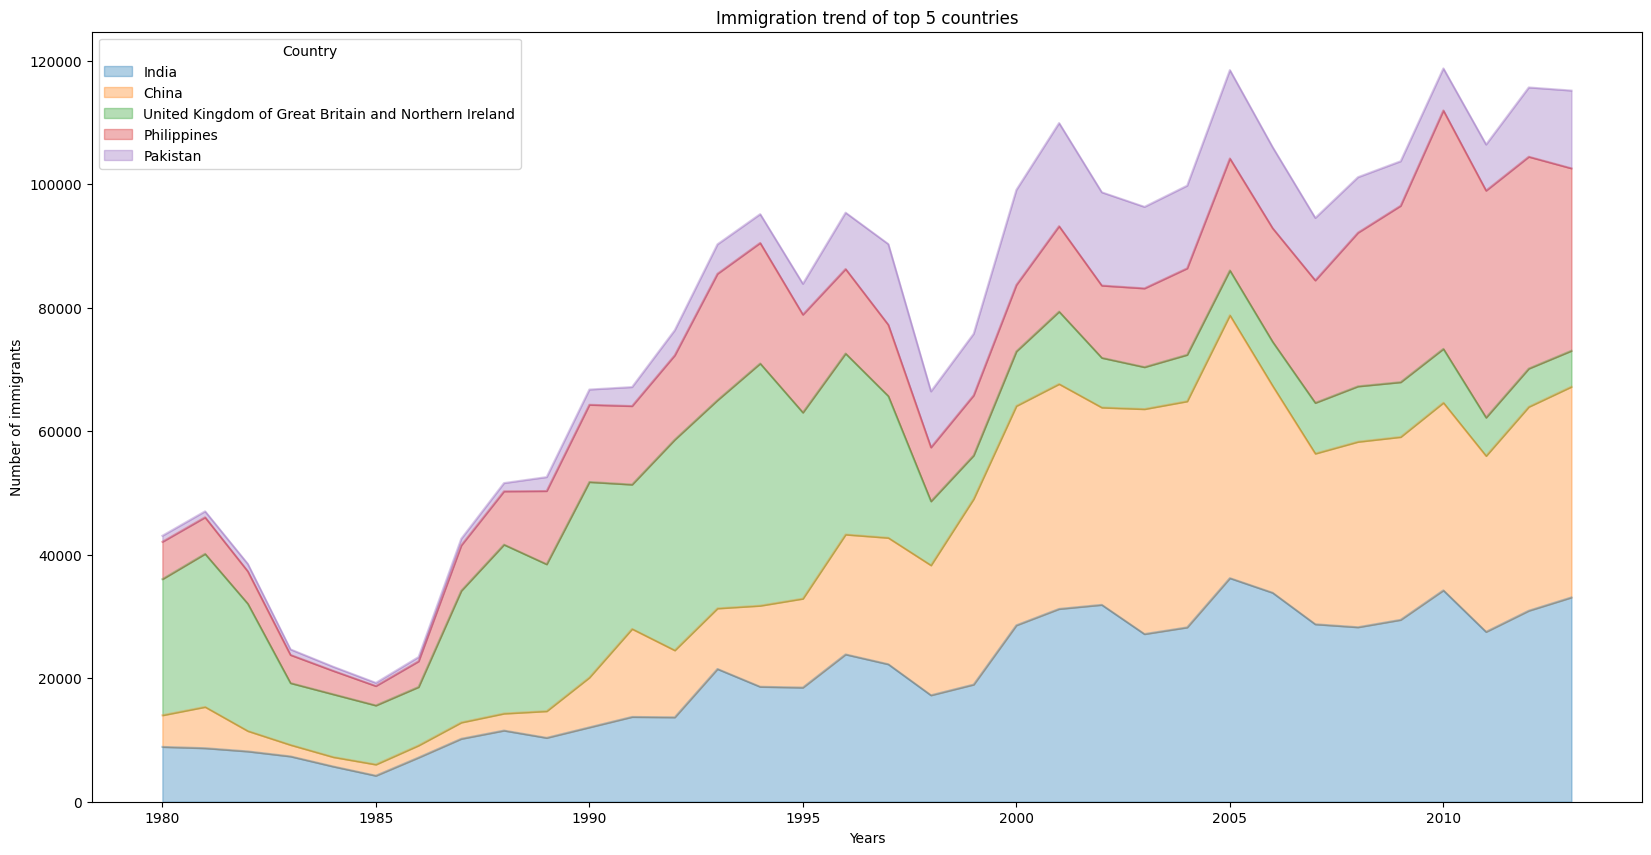

In [22]:
# Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' 
df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')